In [1]:
#Зниження розмірності і візуалізація даних

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns


df = pd.read_csv("D:\Downloads\Video_games_esrb_rating.csv",sep=",", low_memory=False)  #завантажит дані

In [2]:
df.keys()  #фичи

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

In [3]:
df=df.drop(['title'], axis = 1)  #расчесываем данные аналогично прошлой лабе(2)
s = df['esrb_rating']
s, unique = pd.factorize(s)
df['esrb_rating'] = s
df.info()
df=df.drop(['fantasy_violence','alcohol_reference','cartoon_violence','console','animated_blood', 'mild_lyrics', 'mild_language', 'strong_sexual_content', 'nudity', 'use_of_drugs_and_alcohol', 'partial_nudity', 'mild_violence', 'mature_humor', 'use_of_alcohol', 'drug_reference', 'strong_janguage', 'lyrics'], axis = 1)
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   console                   1895 non-null   int64
 1   alcohol_reference         1895 non-null   int64
 2   animated_blood            1895 non-null   int64
 3   blood                     1895 non-null   int64
 4   blood_and_gore            1895 non-null   int64
 5   cartoon_violence          1895 non-null   int64
 6   crude_humor               1895 non-null   int64
 7   drug_reference            1895 non-null   int64
 8   fantasy_violence          1895 non-null   int64
 9   intense_violence          1895 non-null   int64
 10  language                  1895 non-null   int64
 11  lyrics                    1895 non-null   int64
 12  mature_humor              1895 non-null   int64
 13  mild_blood                1895 non-null   int64
 14  mild_cartoon_violence     1895 non-null 

blood                     int64
blood_and_gore            int64
crude_humor               int64
intense_violence          int64
language                  int64
mild_blood                int64
mild_cartoon_violence     int64
mild_fantasy_violence     int64
mild_suggestive_themes    int64
no_descriptors            int64
sexual_content            int64
sexual_themes             int64
simulated_gambling        int64
suggestive_themes         int64
violence                  int64
esrb_rating               int64
dtype: object

In [4]:
continuousColumns = ["blood", "blood_and_gore", "crude_humor", "intense_violence", "language", "mild_blood", "mild_cartoon_violence", "mild_fantasy_violence", "mild_suggestive_themes", "no_descriptors", "sexual_content", "sexual_themes", "simulated_gambling", "suggestive_themes", "violence"]

In [5]:
minMaxScaler = MinMaxScaler() #масштабирует в приделах задан. диапазона 0-1, именно колонки
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)

In [24]:
pca = PCA()   
X_pca = pca.fit_transform(scaledColums)  #пса работает на колонках
exp_var_pca = pca.explained_variance_ratio_  #вектор- дисперсия для кажд столбика(фичи) 
cum_sum_eigenvalues = np.cumsum(exp_var_pca) #вернет сумму по дисперсии

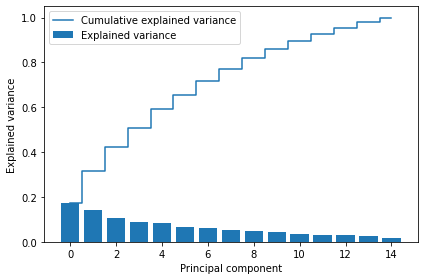

In [25]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()     #кол-во колонок

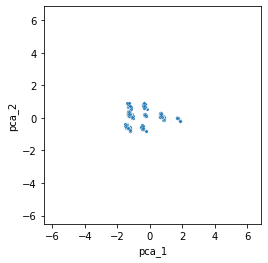

In [26]:
pca = PCA(n_components=2)  #самая большая разница между кол-вом
pca_result = pca.fit_transform(df)  #трансформируем в с2 фичи

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]}) 

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)  
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

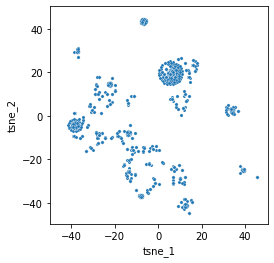

In [28]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)   #для визуализации до 2х измерений, разница - т-распределение стьюдента
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')